In [1]:
# 사용방법 - 복사하여 주석만 제거하여 사용
import sys
from pathlib import Path

# 현재 노트북(.ipynb)이 src/ 안에 있으니 상위 폴더(프로젝트 루트)를 추가
BASE_DIR    = Path().resolve().parent.parent    # Notebook이 src/ 안이라면 .parent
config_path = BASE_DIR / 'config' / 'data_paths.yaml'
sys.path.insert(0, str(BASE_DIR))


# 이제 바로 import
from scripts.data_loader import load_data

# 1. "미세먼지 농도가 높으면 질병율(천식)이 높을 것이다." 
p-value = 0.000 → 0.05보다 작으므로 귀무가설을 기각할 수 있음

따라서 "미세먼지 농도가 높을수록 천식 환자 진료량이 증가한다"는 증거는 통계적으로 충분합니다.

In [ ]:
# 천식·PM10 결합 결과 불러오기
asthma_df = load_data('pm10_asthma_processed_v1', section='processed')

# 날짜 매핑 → season 붙이기
date_map =load_data('date_map', section='reference')
date_map['date_id'] = date_map['date_id'].astype(str)
date_map['year_month'] = date_map['date_id'].str[:4] + '-' + date_map['date_id'].str[4:6]
season_map = date_map[['year_month']].drop_duplicates()

df = asthma_df.merge(season_map, on='year_month', how='left')

# 월별 전국 총 진료 건수 집계
monthly = (
    df
    .groupby(['year_month'], as_index=False)['visit_count']
    .sum()
    .rename(columns={'visit_count':'total_visit_count'})
)

pm10_wide = load_data('pm10_processed_v1', section='processed')
pm10_long = pm10_wide.melt(id_vars='year_month', var_name='region', value_name='pm10')
pm10_avg = pm10_long.groupby('year_month', as_index=False)['pm10'].mean()

In [6]:
# EDA용 최종 테이블
eda_df = monthly.merge(pm10_avg, on='year_month', how='left')
eda_df.head()

,year_month,total_visit_count,pm10
0,2006-01,599903,60.759375
1,2006-02,303703,61.396875
2,2006-03,372257,78.373437
3,2006-04,408013,94.417187
4,2006-05,345442,61.789062


                            OLS Regression Results                            
Dep. Variable:      total_visit_count   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     121.4
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.19e-22
Time:                        10:16:55   Log-Likelihood:                -2744.0
No. Observations:                 216   AIC:                             5492.
Df Residuals:                     214   BIC:                             5499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.479e+04   1.79e+04      5.307      0.0

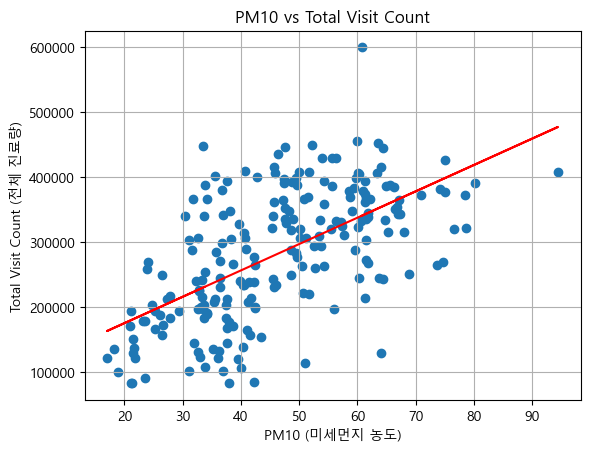

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

# 독립변수(X), 종속변수(y)
X = eda_df['pm10']
y = eda_df['total_visit_count']

# 상수항 추가
X_const = sm.add_constant(X)

# 회귀모델 적합
model = sm.OLS(y, X_const).fit()

# 결과 출력
print(model.summary())

# 시각화
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.scatter(X, y)
plt.plot(X, model.predict(X_const), color='red')  # 회귀선
plt.xlabel('PM10 (미세먼지 농도)')
plt.ylabel('Total Visit Count (전체 진료량)')
plt.title('PM10 vs Total Visit Count')
plt.grid(True)
plt.show()

p-value = 0.000 → 0.05보다 작으므로 귀무가설을 기각할 수 있음

따라서 "미세먼지 농도가 높을수록 천식 환자 진료량이 증가한다"는 증거는 통계적으로 충분합니다.

# 1. "미세먼지 농도가 높으면 질병율(비염)이 높을 것이다."
p-value = 0.226 → 0.05보다 크므로 귀무가설을 기각할 수 없음

따라서 "미세먼지 농도가 높을수록 천식 환자 진료량이 증가한다"는 증거는 통계적으로 부족합니다.

In [2]:
# 비염·PM10 결합 결과 불러오기
rhinitis_df = load_data('pm10_rhinitis_processed_v1', section='processed')

# 날짜 매핑 → season 붙이기
date_map =load_data('date_map', section='reference')
date_map['date_id'] = date_map['date_id'].astype(str)
date_map['year_month'] = date_map['date_id'].str[:4] + '-' + date_map['date_id'].str[4:6]
season_map = date_map[['year_month']].drop_duplicates()

df = rhinitis_df.merge(season_map, on='year_month', how='left')

# 월별 전국 총 진료 건수 집계
monthly = (
    df
    .groupby(['year_month'], as_index=False)['visit_count']
    .sum()
    .rename(columns={'visit_count':'total_visit_count'})
)

pm10_wide = load_data('pm10_processed_v1', section='processed')
pm10_long = pm10_wide.melt(id_vars='year_month', var_name='region', value_name='pm10')
pm10_avg = pm10_long.groupby('year_month', as_index=False)['pm10'].mean()

In [3]:
# EDA용 최종 테이블
eda_df2 = monthly.merge(pm10_avg, on='year_month', how='left')
eda_df2.head()

,year_month,total_visit_count,pm10
0,2006-01,1979765,60.759375
1,2006-02,1106793,61.396875
2,2006-03,1373518,78.373437
3,2006-04,1327641,94.417187
4,2006-05,1083774,61.789062


                            OLS Regression Results                            
Dep. Variable:      total_visit_count   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.475
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.226
Time:                        10:42:38   Log-Likelihood:                -3175.0
No. Observations:                 216   AIC:                             6354.
Df Residuals:                     214   BIC:                             6361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.673e+06   1.31e+05     12.737      0.0

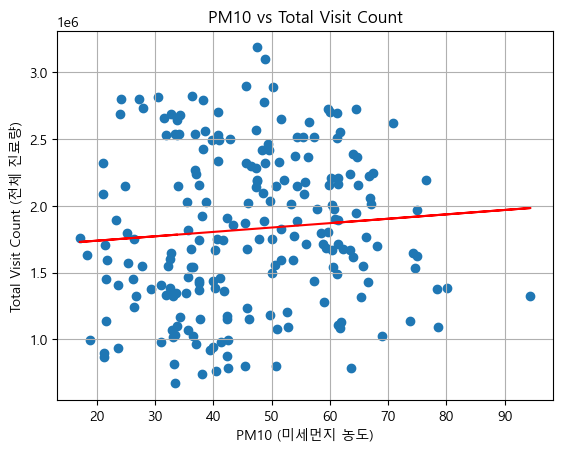

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

# 독립변수(X), 종속변수(y)
X = eda_df2['pm10']
y = eda_df2['total_visit_count']

# 상수항 추가
X_const = sm.add_constant(X)

# 회귀모델 적합
model = sm.OLS(y, X_const).fit()

# 결과 출력
print(model.summary())

# 시각화
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.scatter(X, y)
plt.plot(X, model.predict(X_const), color='red')  # 회귀선
plt.xlabel('PM10 (미세먼지 농도)')
plt.ylabel('Total Visit Count (전체 진료량)')
plt.title('PM10 vs Total Visit Count')
plt.grid(True)
plt.show()

p-value = 0.226 → 0.05보다 크므로 귀무가설을 기각할 수 없음

따라서 "미세먼지 농도가 높을수록 천식 환자 진료량이 증가한다"는 증거는 통계적으로 부족합니다.